<a href="https://colab.research.google.com/github/isatkm22/ProjetoK-means/blob/main/An%C3%A1lise_do_Algoritmo_de_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Carregar os nomes das features e das atividades
features = pd.read_csv('features.txt', sep='\s+', header=None, names=['index', 'feature'])
activities = pd.read_csv('activity_labels.txt', sep=' ', header=None, names=['id', 'activity'])

# Visualizar os dados carregados
print(features.head())
print(activities.head())

X_train = pd.read_csv('X_train.txt', sep='\s+', header=None)
y_train = pd.read_csv('y_train.txt', sep='\s+', header=None)

# Verificar as primeiras linhas de X_train
print("Primeiras linhas de X_train:")
print(X_train.head())

# Verificar as primeiras linhas de y_train
print("\nPrimeiras linhas de y_train:")
print(y_train.head())


# Normalizar as features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_train)  # Substitua X_train pelos dados carregados

   index            feature
0      1  tBodyAcc-mean()-X
1      2  tBodyAcc-mean()-Y
2      3  tBodyAcc-mean()-Z
3      4   tBodyAcc-std()-X
4      5   tBodyAcc-std()-Y
   id            activity
0   1             WALKING
1   2    WALKING_UPSTAIRS
2   3  WALKING_DOWNSTAIRS
3   4             SITTING
4   5            STANDING
Primeiras linhas de X_train:
        0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       551       552       553       554  \
0 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304 -0.112754   
1 -0.974914 -0.957686 -0.943068  ...

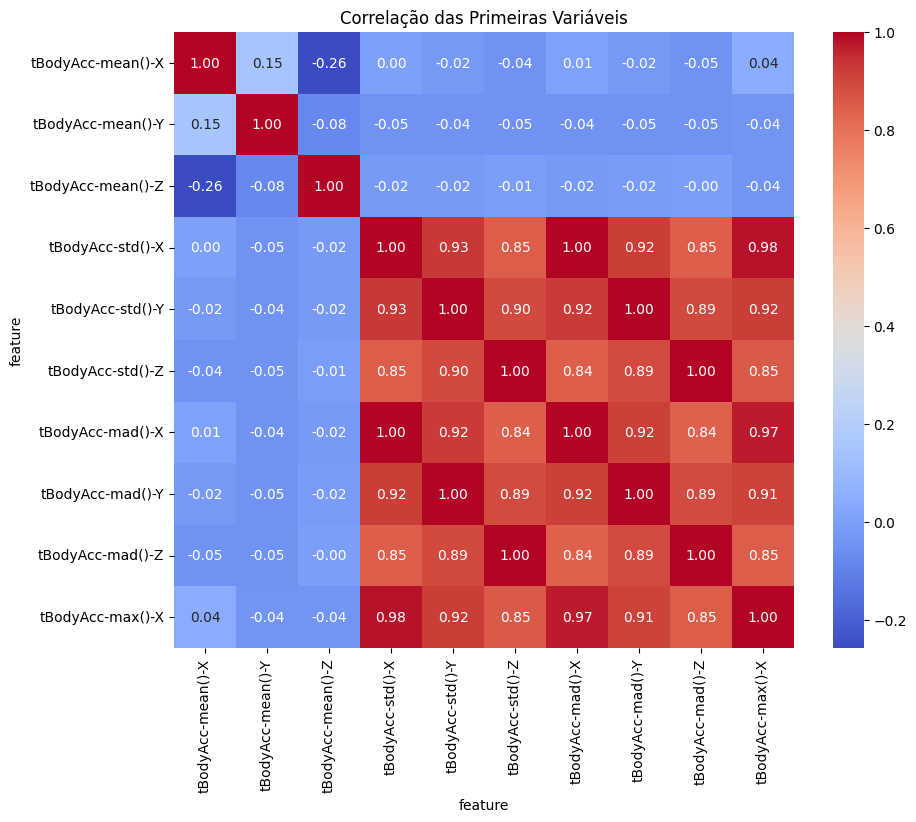

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotar a matriz de correlação para as primeiras variáveis
corr_matrix = pd.DataFrame(X_normalized, columns=features['feature']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.iloc[:10, :10], annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlação das Primeiras Variáveis')
plt.show()


Variância explicada pelas componentes: [0.50781172 0.0658068 ]


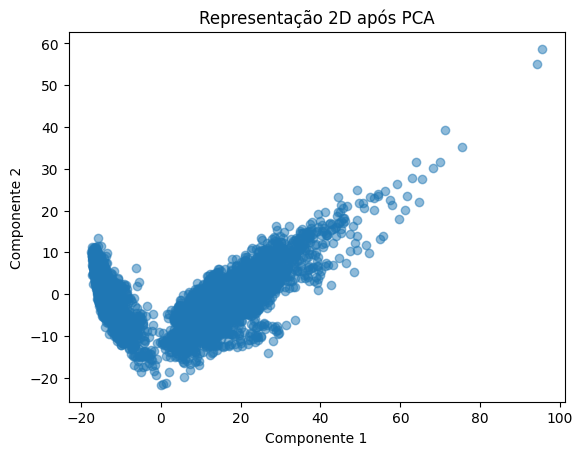

In [14]:
from sklearn.decomposition import PCA

# PCA para reduzir a dimensionalidade
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# Visualizar a variância explicada
print(f"Variância explicada pelas componentes: {pca.explained_variance_ratio_}")

# Plotar as primeiras duas componentes
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('Representação 2D após PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()


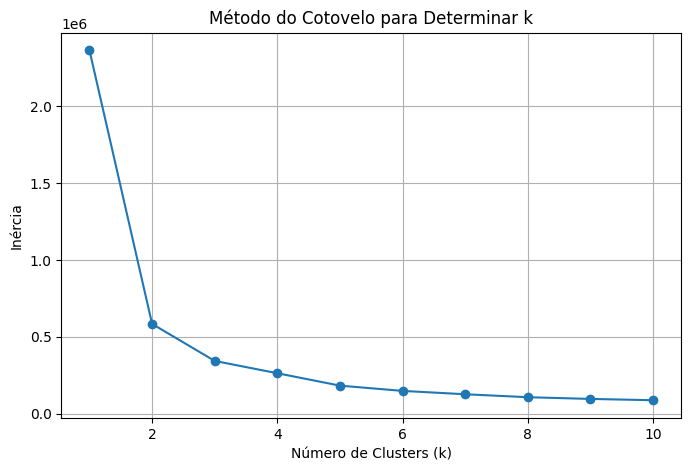

Coordenadas dos centróides:
[[-15.30982595   4.23811539]
 [ 15.84716755  -1.43557244]
 [-11.91733687  -4.21901605]
 [ 43.5013296   15.04666781]
 [  8.38085019  -7.81820791]
 [ 25.34215526   4.01703112]]


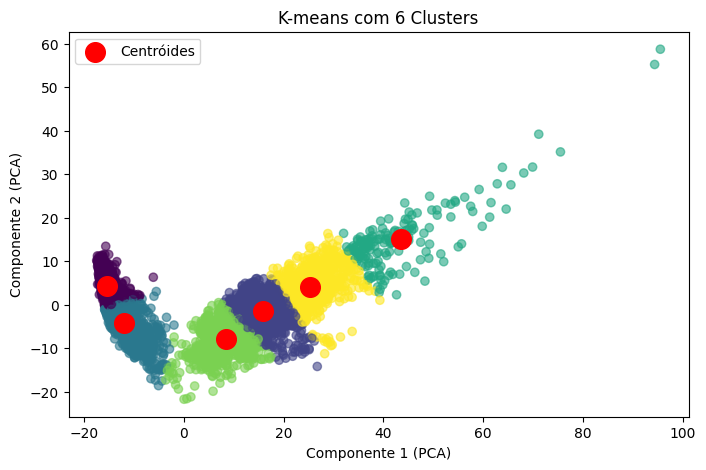

Pontuação de Silhouette para k=6: 0.47


In [10]:
from sklearn.cluster import KMeans

# Determinar o número de clusters usando o método do cotovelo
inertia = []
k_values = range(1, 11)  # Testar de 1 a 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)  # Usando os dados reduzidos pelo PCA
    inertia.append(kmeans.inertia_)

# Plotar o método do cotovelo
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Método do Cotovelo para Determinar k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.grid()
plt.show()



# Número ideal de clusters (substitua pelo valor encontrado)
k_optimal = 6

# Aplicar K-means
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_pca)  # Retorna os rótulos dos clusters

# Visualizar os centróides
print("Coordenadas dos centróides:")
print(kmeans.cluster_centers_)


# Plotar os clusters encontrados
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centróides')
plt.title(f"K-means com {k_optimal} Clusters")
plt.xlabel('Componente 1 (PCA)')
plt.ylabel('Componente 2 (PCA)')
plt.legend()
plt.show()




from sklearn.metrics import silhouette_score

# Calcular a pontuação de Silhouette
silhouette_avg = silhouette_score(X_pca, clusters)
print(f"Pontuação de Silhouette para k={k_optimal}: {silhouette_avg:.2f}")


Pontuações de Silhouette nas 10 execuções: [0.4788227050459867, 0.4819717335860182, 0.47507552949580606, 0.4741627111609127, 0.4737207504198504, 0.4806799910220963, 0.4787333864936397, 0.47495630247790055, 0.47438086600896734, 0.47506728323350805]
Pontuação média de Silhouette: 0.4768
Desvio padrão: 0.0029


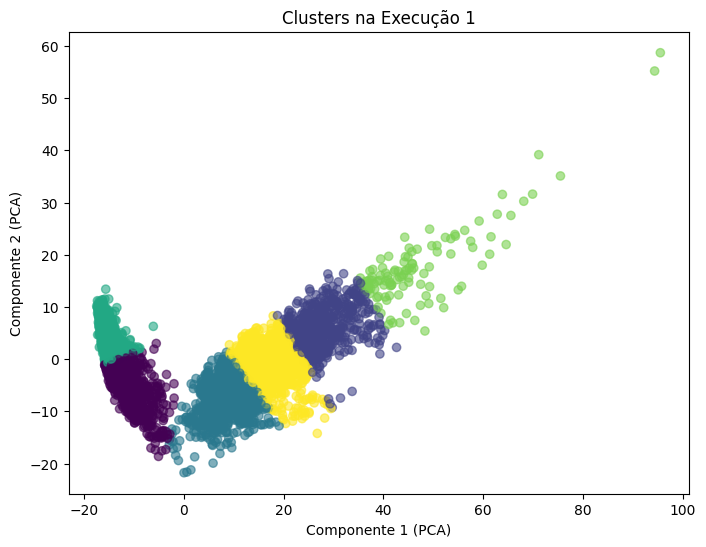

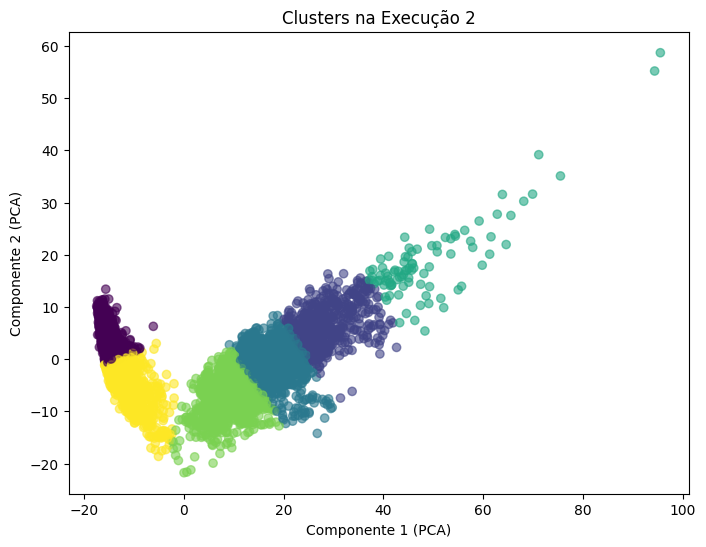

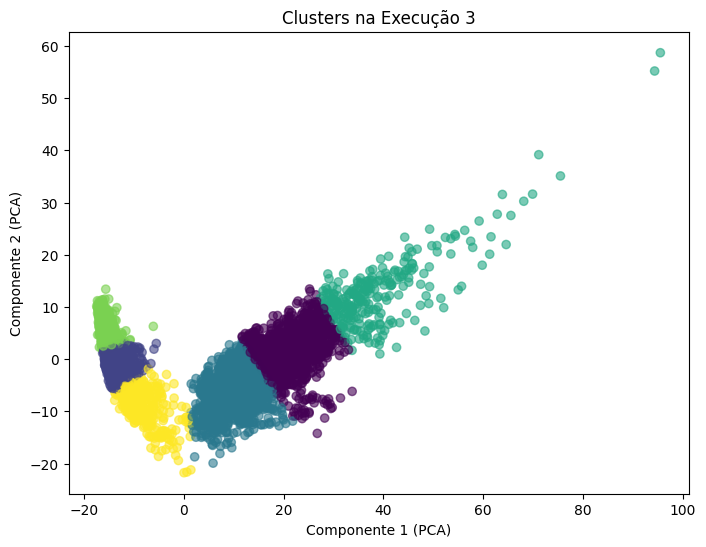

In [ ]:
import numpy as np

# Configuração para múltiplas execuções do K-means
n_runs = 10  # Número de execuções independentes
silhouette_scores = []
clusterings = []

for i in range(n_runs):
    kmeans = KMeans(
        n_clusters=k_optimal,
        init='k-means++',
        n_init=1,  # Apenas uma inicialização por execução
        max_iter=300,
        random_state=i  # Diferentes seeds
    )
    clusters = kmeans.fit_predict(X_pca)
    clusterings.append(clusters)

    # Calcular o Silhouette Score para cada execução
    silhouette_avg = silhouette_score(X_pca, clusters)
    silhouette_scores.append(silhouette_avg)

# Resultados das execuções
print(f"Pontuações de Silhouette nas {n_runs} execuções: {silhouette_scores}")
print(f"Pontuação média de Silhouette: {np.mean(silhouette_scores):.4f}")
print(f"Desvio padrão: {np.std(silhouette_scores):.4f}")


import matplotlib.pyplot as plt

# Visualizar clusters para as 3 primeiras execuções como exemplo
for i in range(3):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusterings[i], cmap='viridis', alpha=0.6)
    plt.title(f"Clusters na Execução {i + 1}")
    plt.xlabel("Componente 1 (PCA)")
    plt.ylabel("Componente 2 (PCA)")
    plt.show()




Activity  LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
Cluster                                                            
0            950      833       761        0                   0   
1              0        0         0      640                 362   
2            435      444       612        0                   0   
3              0        0         0       28                 134   
4             22        9         1      263                  93   
5              0        0         0      295                 397   

Activity  WALKING_UPSTAIRS  
Cluster                     
0                        0  
1                      305  
2                        0  
3                        1  
4                      672  
5                       95  


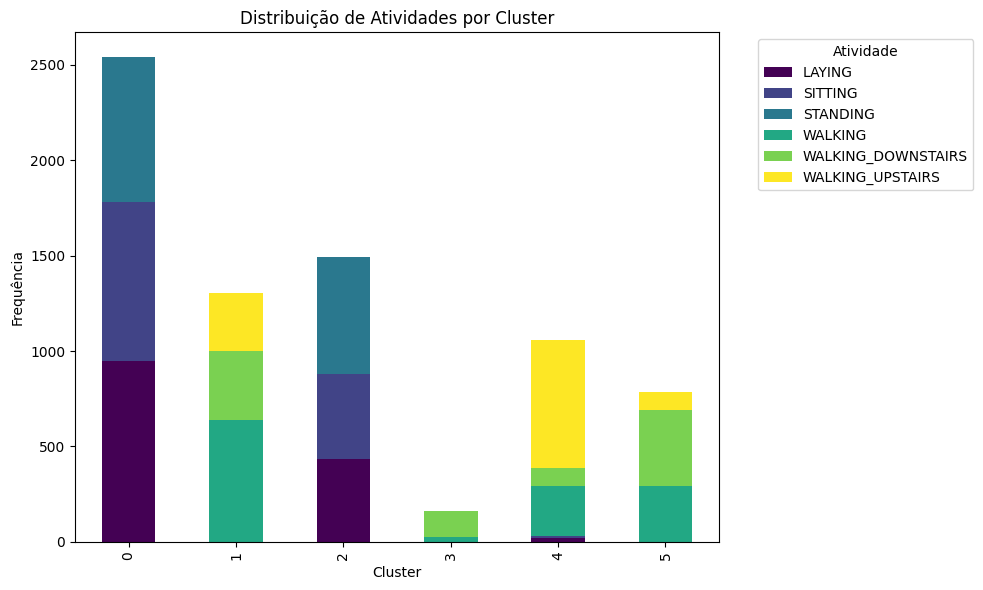

In [13]:
import matplotlib.pyplot as plt

# Criar um DataFrame com clusters e atividades
cluster_results = pd.DataFrame({
    'Cluster': clusters,
    'Activity': y_train[0].map(activities.set_index('id')['activity'])
})

# Contar a distribuição das atividades em cada cluster
activity_distribution = cluster_results.groupby(['Cluster', 'Activity']).size().unstack(fill_value=0)
print(activity_distribution)

# Visualizar a distribuição
activity_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')
plt.title("Distribuição de Atividades por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Frequência")
plt.legend(title="Atividade", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

